In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from datetime import datetime, timedelta

In [19]:
def plot_histogram(simulations, ticker, t):
    final_prices = simulations[:, -1]  # Extract final prices from all simulations
    median_prices = np.median(simulations, axis=0)  # Compute median trajectory

    # Get the actual future prediction date
    prediction_date = (datetime.today() + timedelta(days=t)).strftime("%B %d, %Y")

    p5, p50, p95 = np.percentile(final_prices, [5, 50, 95])
    print(
        f"Monte Carlo Simulation for {ticker} - Projected Price on {prediction_date}:"
    )
    print(f"5th Percentile (Low Risk Estimate): ${p5:.2f}")
    print(f"Median Price (Most Likely Outcome): ${p50:.2f}")
    print(f"95th Percentile (High Reward Estimate): ${p95:.2f}\n")

    # Probability distribution plot (Histogram)
    plt.figure(figsize=(12, 6))
    sns.histplot(final_prices, bins=50, kde=True, color="blue", alpha=0.6)

    # Mark confidence intervals
    plt.axvline(
        p5, color="red", linestyle="dashed", label="5th Percentile (Low Risk)"
    )
    plt.axvline(
        p50,
        color="black",
        linestyle="dashed",
        label="Median Price (Most Likely Outcome)",
    )
    plt.axvline(
        p95,
        color="green",
        linestyle="dashed",
        label="95th Percentile (High Reward)",
    )
    plt.title(
        f"Probability Distribution of {ticker} Stock Price Over {t} Days ({prediction_date})"
    )
    plt.xlabel("Projected Stock Price, $")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

In [20]:
def plot_paths(simulations, historical_prices, ticker, t):
    # Monte Carlo Simulation Paths
    plt.figure(figsize=(12, 6))

    # Plot simulated paths
    plt.plot(simulations.T, alpha=0.05, color="blue")

    # # Overlay median trajectory (trend indicator)
    # plt.plot(median_prices, color='black', linewidth=2, label="Median Monte Carlo Projection")

    # Overlay actual historical prices for comparison
    plt.plot(
        range(len(historical_prices)),
        historical_prices,
        color="red",
        linewidth=2,
        label=f"Historical trajectory for last {t} days",
    )

    plt.title(f"Monte Carlo Simulation with Trends for {ticker} Over {t} Days")
    plt.xlabel("Days")
    plt.ylabel("Projected Stock Price, $")
    plt.legend()
    plt.show()

In [21]:
def monte_carlo(ticker, start_date, num_simulations=1000):
    stock_data = yf.download(ticker, start=start_date)
    stock_data["Returns"] = np.log(
        stock_data["Close"] / stock_data["Close"].shift(1)
    )  # Adjusted returns

    mean_return = stock_data["Returns"].mean()
    volatility = stock_data["Returns"].std()
    last_price = stock_data["Close"].iloc[-1]

    time_frames = [7, 30, 90, 180, 365]
    for t in time_frames:
        simulations = np.zeros((num_simulations, t))

        for sim in range(num_simulations):
            price_series = np.zeros(t)
            price_series[0] = float(last_price.iloc[0])
            for i in range(1, t):
                price_series[i] = price_series[i - 1] * np.exp(
                    np.random.normal(mean_return, volatility)
                )  # Log-normal scaling
            simulations[sim, :] = price_series
        
        historical_prices = stock_data["Close"][-t:]  # Extract last historical prices
        plot_histogram(simulations, ticker, t)
        plot_paths(simulations, historical_prices, ticker, t)

[*********************100%***********************]  1 of 1 completed


Monte Carlo Simulation for TGT - Projected Price on June 11, 2025:
5th Percentile (Low Risk Estimate): $86.19
Median Price (Most Likely Outcome): $94.13
95th Percentile (High Reward Estimate): $102.76



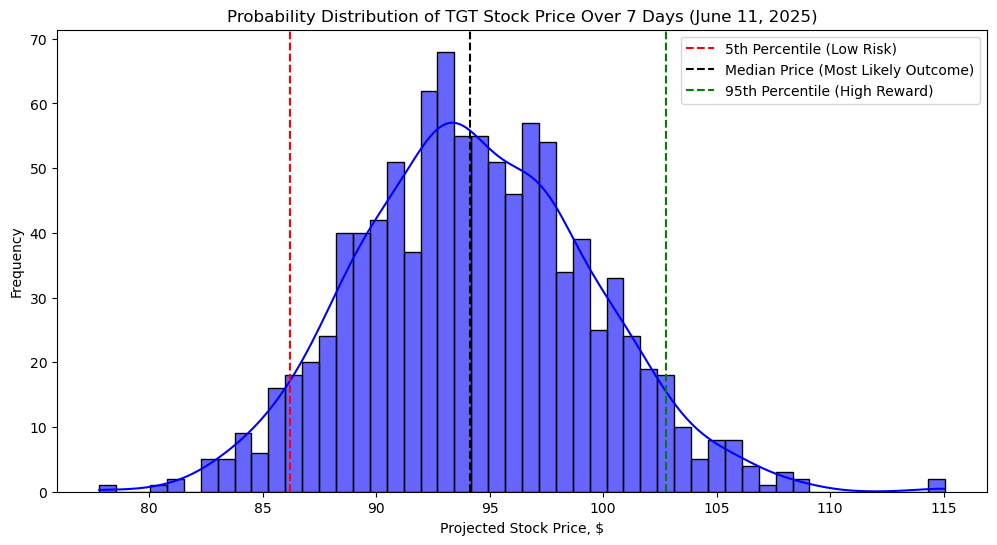

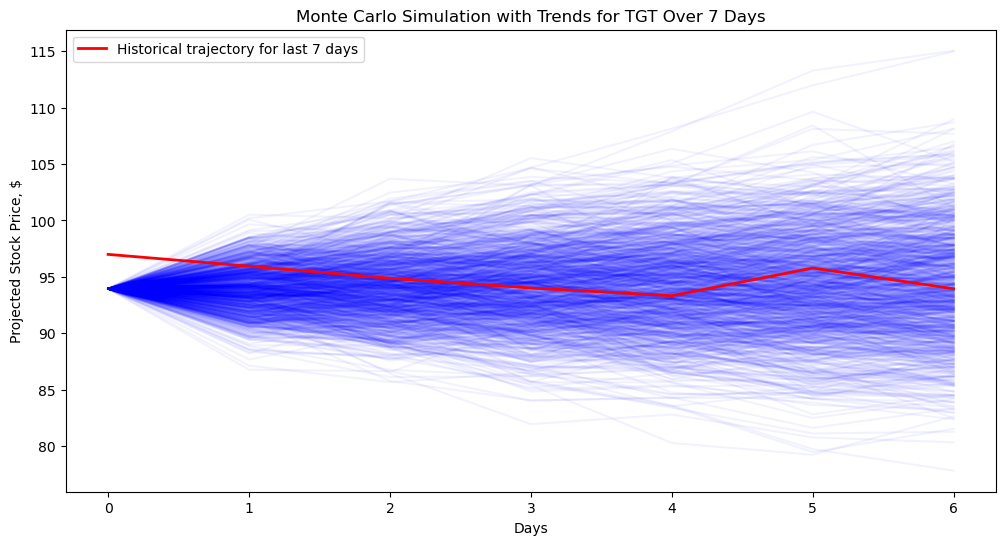

Monte Carlo Simulation for TGT - Projected Price on July 04, 2025:
5th Percentile (Low Risk Estimate): $78.67
Median Price (Most Likely Outcome): $94.60
95th Percentile (High Reward Estimate): $115.46



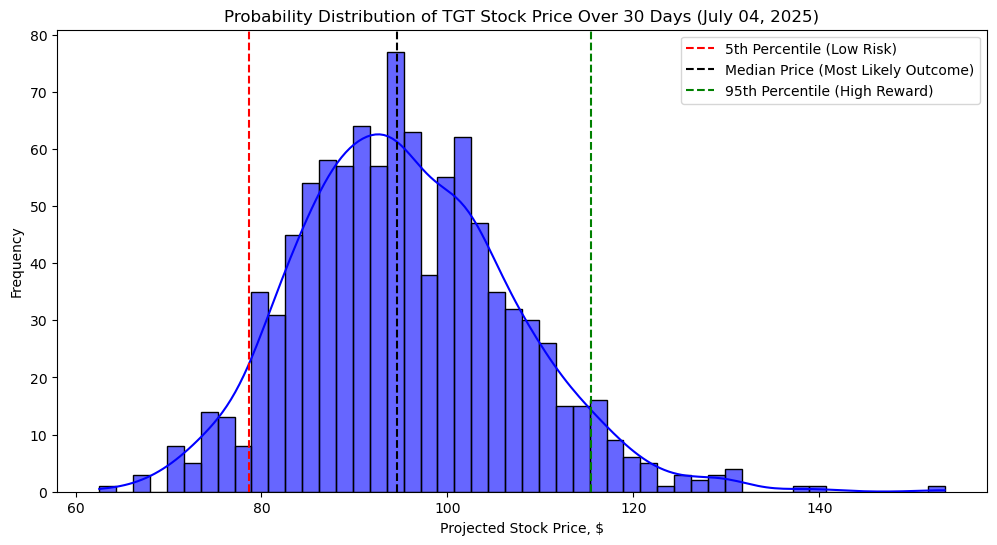

c:\Users\arsen\anaconda3\envs\dev\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


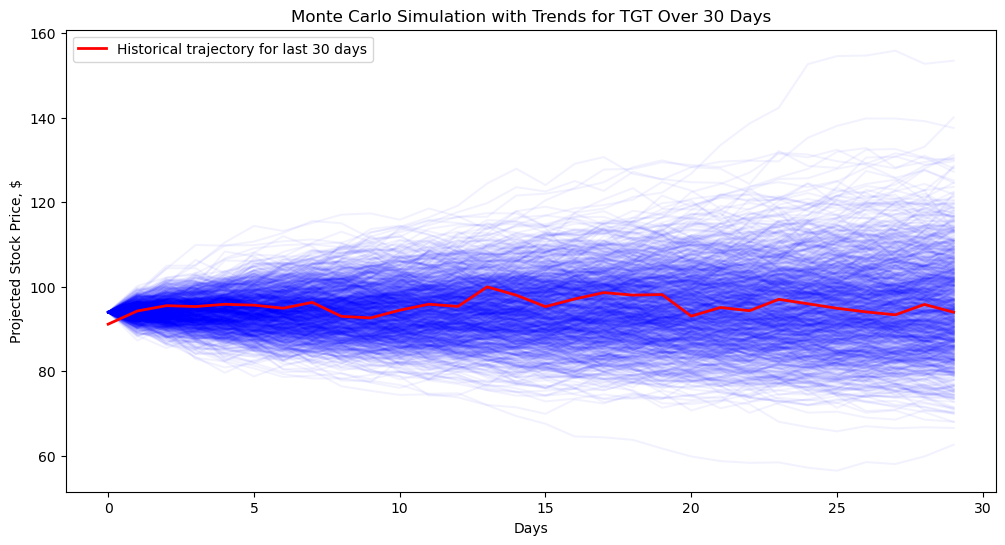

Monte Carlo Simulation for TGT - Projected Price on September 02, 2025:
5th Percentile (Low Risk Estimate): $67.69
Median Price (Most Likely Outcome): $96.17
95th Percentile (High Reward Estimate): $133.72



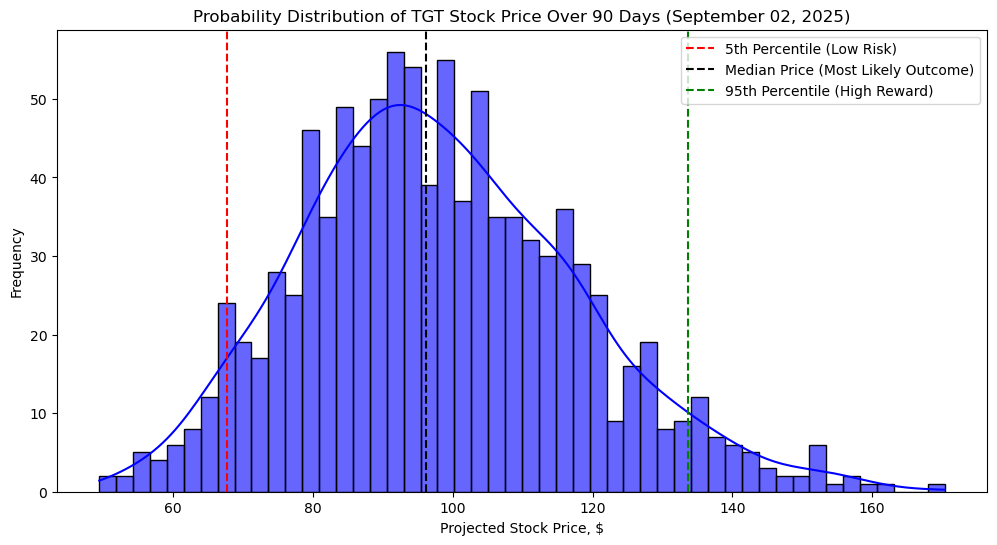

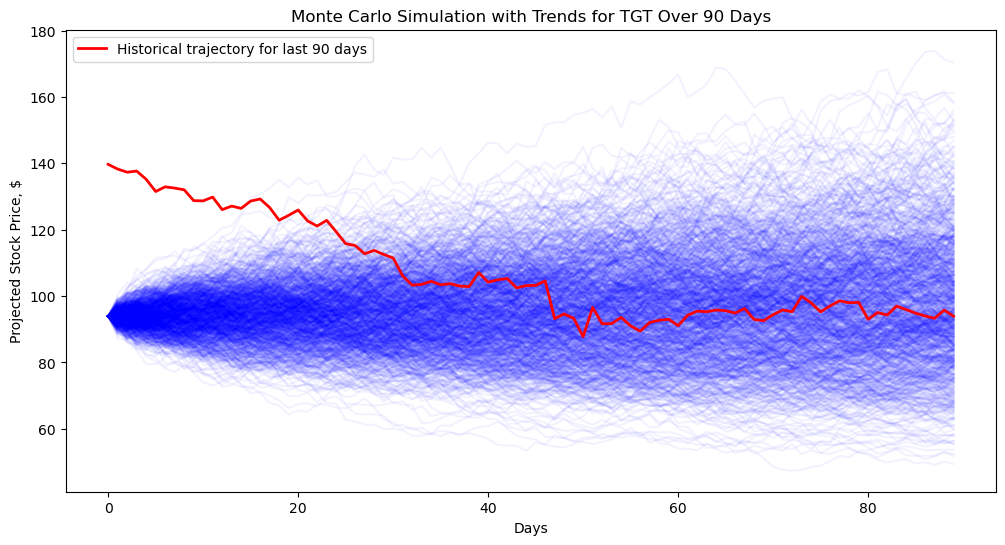

Monte Carlo Simulation for TGT - Projected Price on December 01, 2025:
5th Percentile (Low Risk Estimate): $60.90
Median Price (Most Likely Outcome): $99.22
95th Percentile (High Reward Estimate): $160.12



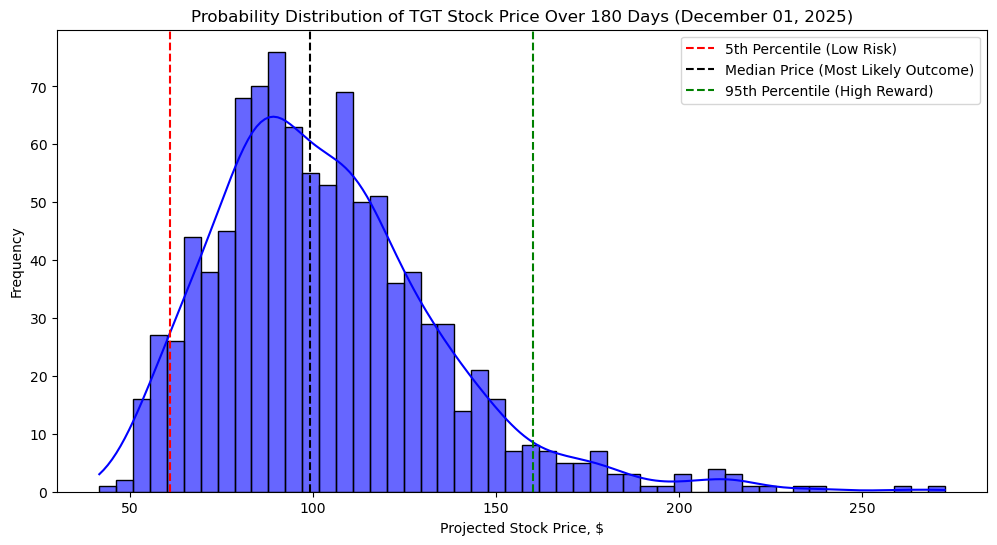

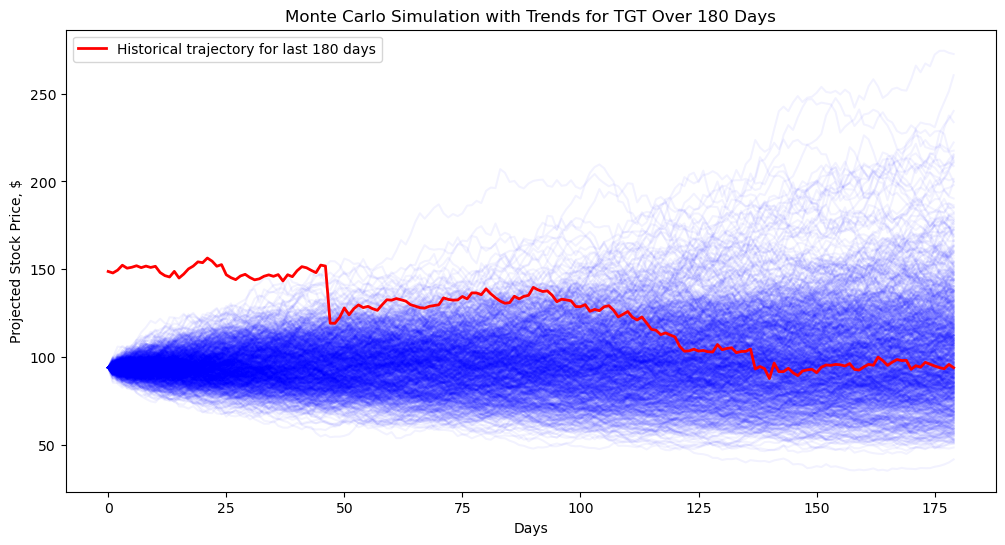

Monte Carlo Simulation for TGT - Projected Price on June 04, 2026:
5th Percentile (Low Risk Estimate): $53.57
Median Price (Most Likely Outcome): $102.43
95th Percentile (High Reward Estimate): $213.71



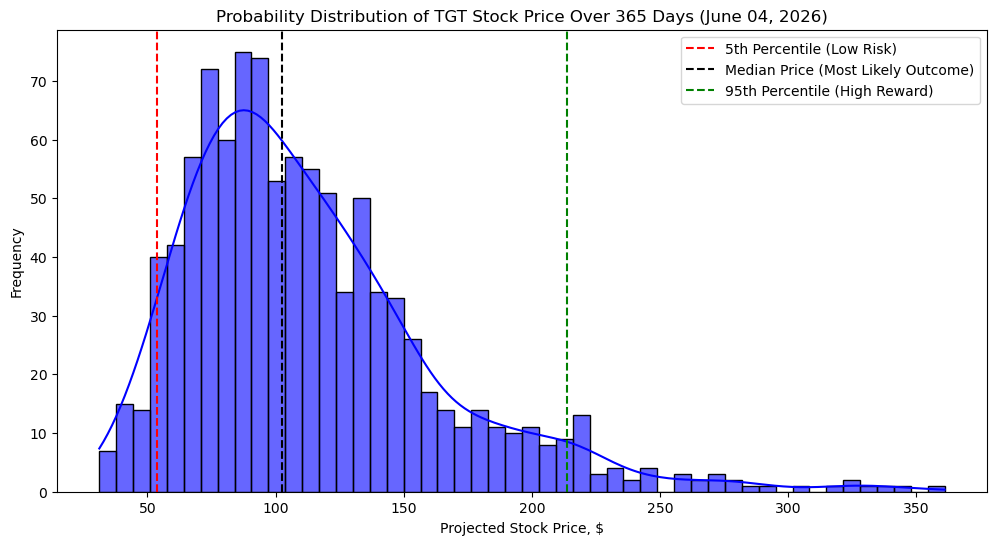

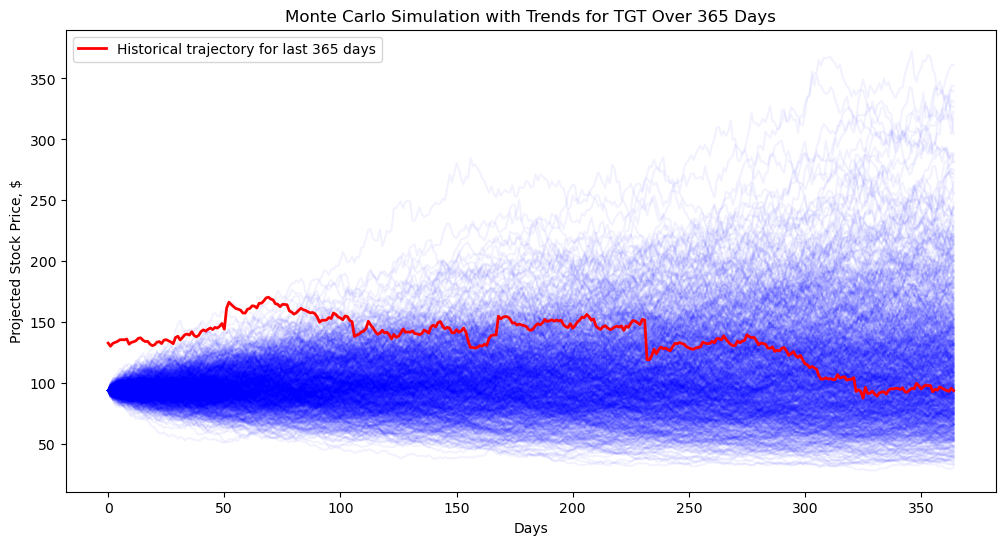

In [22]:
tckr = str(input("Enter your Ticker: "))
tckr = tckr.upper()  # Convert to uppercase for consistency
start_date = "2018-01-01"
monte_carlo(tckr, start_date)